# **Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 
# **Goals of the Case Study**


There are quite a few goals for this case study:

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well

 

In [1]:
# Suppres Warnings

import warnings
warnings.filterwarnings("ignore")

# Importing important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Visualization
from matplotlib.pyplot import xticks
%matplotlib inline

# Data Visualization Customization
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)



**DATA PREPARATION**

In [2]:
# importing the dataset

data=pd.read_csv("/content/Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking Duplicates
sum(data.duplicated(subset="Prospect ID"))==0

True

**DATA INSPECTION**

In [4]:
data.shape

(9240, 37)

There are 9240 rows and 37 columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**DATA CLEANING**

In [7]:
# We can observe that there are select values for many coloums. This is because customer did not select any of the option from the list.Select values are as good as null.
# Hence we can replace Select with Null

data=data.replace("Select",np.nan)

In [8]:
# Checking is there any null values present
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# Let us remove all the columns with missing values more than >70% NA Values
data=data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)),2)>70)].columns,1)

In [11]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Now we can take care of null values in each column one by one

In [12]:
# Lead Quality
data["Lead Quality"].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

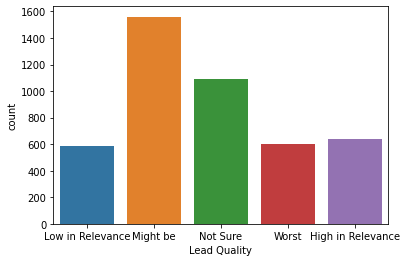

In [13]:
sns.countplot(data['Lead Quality'])

In [14]:
# As the Lead Quality is based on the intution of the employees , so we can replace blank with not sure

data['Lead Quality']=data['Lead Quality'].replace(np.nan ,"Not Sure")

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

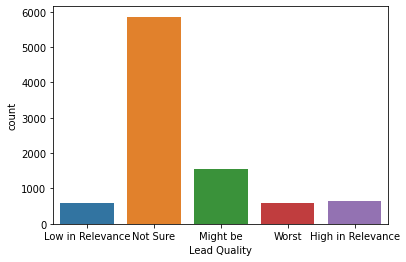

In [15]:
sns.countplot(data['Lead Quality'])

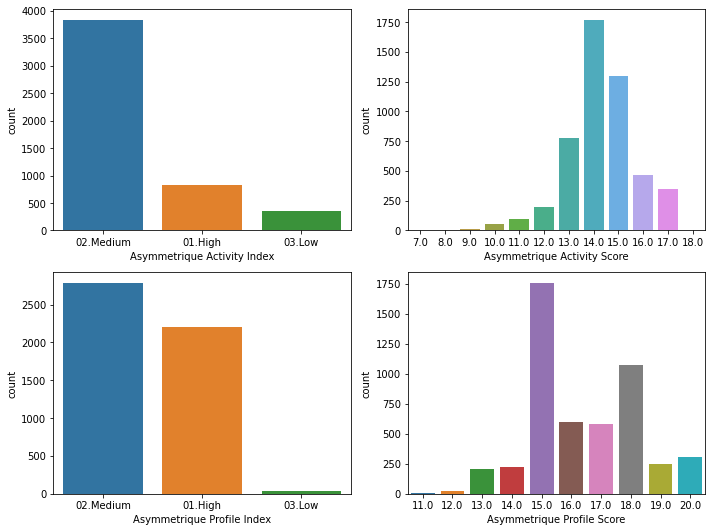

In [16]:
# An index and score assigned to each customer based on their activity and their profile
#Asymmetrique Activity Index
#Asymmetrique Activity Score
#Asymmetrique Profile Index
#Asymmetrique Profile Score

fig,axs=plt.subplots(2,2 , figsize=(10,7.5))
plt1=sns.countplot(data['Asymmetrique Activity Index'],ax=axs[0,0])
plt2=sns.countplot(data['Asymmetrique Activity Score'],ax=axs[0,1])
plt3=sns.countplot(data['Asymmetrique Profile Index'],ax=axs[1,0])
plt4=sns.countplot(data['Asymmetrique Profile Score'],ax=axs[1,1])
plt.tight_layout()


In [17]:
# There is too much variation in the parameters, so its not reliable to impute any value it.
# 45 % nullvalues so we can drop these columns

data=data.drop(['Asymmetrique Activity Index',"Asymmetrique Activity Score","Asymmetrique Profile Index","Asymmetrique Profile Score"],1)

In [18]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [19]:
#City
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

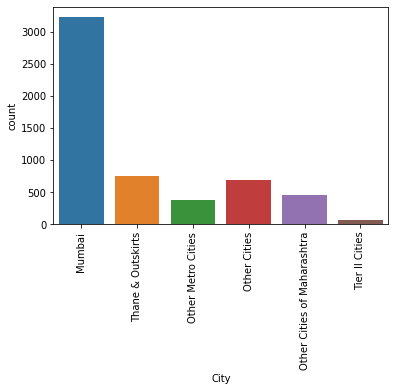

In [20]:
sns.countplot(data["City"])
xticks(rotation=90)

In [21]:
# Around 60% of the data is Mumbai , we can impute missing values with Mumbai
data["City"]=data["City"].replace(np.nan,"Mumbai")

In [22]:
#Specialization
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

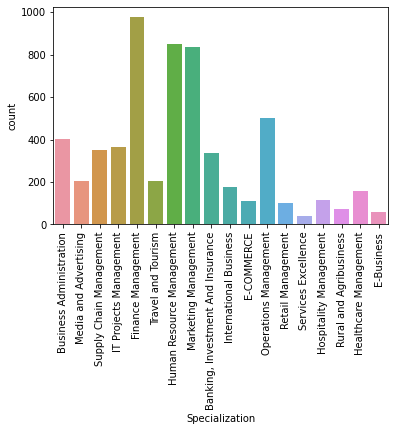

In [23]:
sns.countplot(data["Specialization"])
xticks(rotation=90)

It may be the case that lead has not enetred any specilization if his/ her option is not in the list
or may not have any specilization 
we can replace these missing value with  category "Others"

In [24]:
data["Specialization"]=data["Specialization"].replace(np.nan,"others")

In [25]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [26]:
# Tags

data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

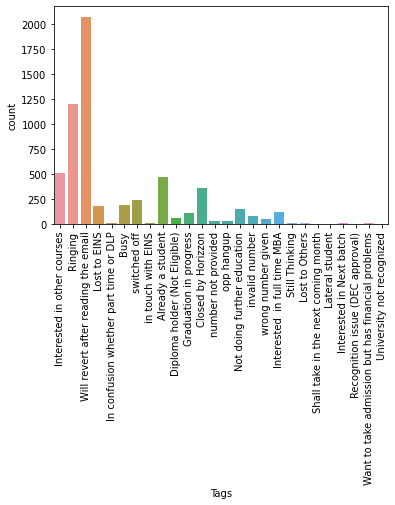

In [27]:
sns.countplot(data["Tags"])
xticks(rotation=90)

In [28]:
# We can replace missing values with 'will revert back after reading the emial"

data["Tags"]=data["Tags"].replace(np.nan,"Will revert after reading the email")

In [29]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [30]:
# what matters most to you in choosing a course

data["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

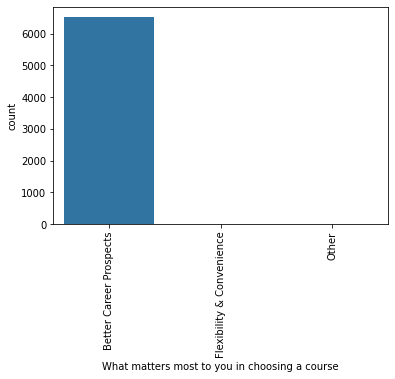

In [31]:
sns.countplot(data["What matters most to you in choosing a course"])
xticks(rotation=90)

In [32]:
# Missing value in this column can be replaced with Better Career Prospects

data["What matters most to you in choosing a course"]=data["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")

In [33]:
#What is your current occupation

data["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [34]:
# 85% of the entries are unemployed , so we can impute the missing values with "Unemployed"

In [35]:
data["What is your current occupation"]=data["What is your current occupation"].replace(np.nan,"Unemployed")

In [36]:
# Country

data["Country"]=data["Country"].replace(np.nan,"India")

In [37]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [38]:
# Reset missing values are under 2% so we can drop these rows

data.dropna(inplace=True)

In [39]:
round(100*(data.isnull().sum()/len(data.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [40]:
data.to_csv("Leads_Cleaned")

Now data is clean , we can start with analysis

**EXPLORATORY DATA ANALYTICS**

UNIVARIATE ANALYSIS

Converted

In [41]:
# Converted is the target variable  indicates whether conversion has been sucessfully completed or not

Converted= sum(data["Converted"])/len(data["Converted"])*100
print(Converted)

37.85541106458012


Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

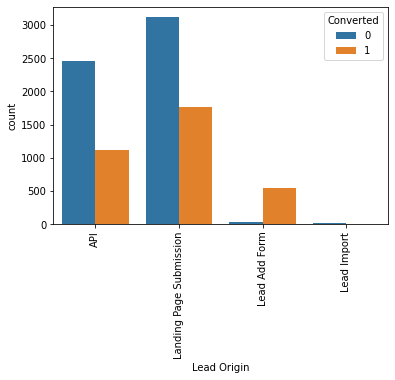

In [42]:
sns.countplot(x="Lead Origin",hue="Converted",data=data)
xticks(rotation=90)

Inference

1. API and Landing Page Submission has around 30 to 35 % conversion rate and Lead originated from here are considereable.
2.Land Add Form has 90% conersion rate but Lead Add form counts are very less
3. Lead Import  are  very less in count

In order to improve more conversion rate , we need to focus on conversion of API and Landing Page submission and generate more leads from Lead Add Form

Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

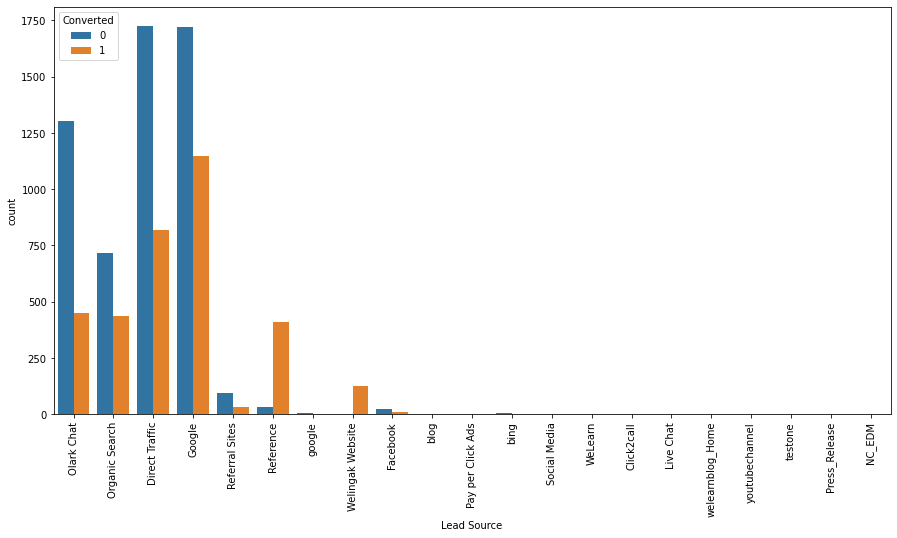

In [43]:
fig , axs= plt.subplots(figsize=(15,7.5))
sns.countplot(x="Lead Source",hue="Converted",data=data)
xticks(rotation=90)

In [44]:
data["Lead Source"]=data["Lead Source"].replace(["google"],"Google")
data["Lead Source"]=data["Lead Source"].replace(["blog","Pay per Click Ads","bing","Social Media","WeLearn","Click2call","Live Chat","welearnblog_Home","youtubechannel","testone","Press_Release","NC_EDM"],"Others")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

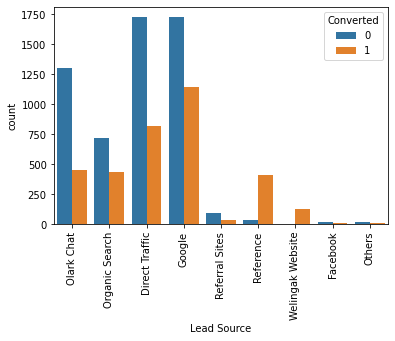

In [45]:
sns.countplot(x="Lead Source",hue="Converted",data=data)
xticks(rotation=90)

Inferences:

1.Lead Conversion from Google and Direct Traffice are quite good

2.Reference Sites and Welingak Website's conversion rate are very high

To improve overall convrsion rate , should focus on Clark Chat , Organic Search ,Direct Traffic , Google leads and generate more leads from Reference Sites and Welingak Website

Do Not Email and Do Not Call

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

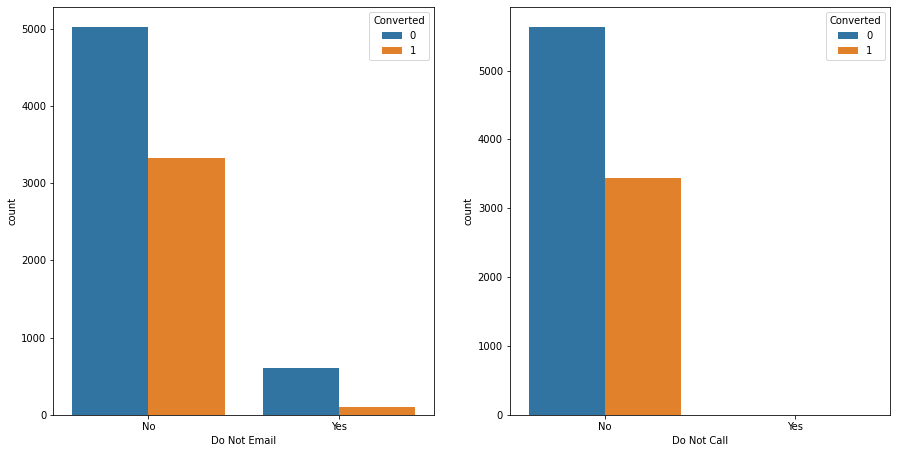

In [46]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

Total Visit

<AxesSubplot:xlabel='TotalVisits'>

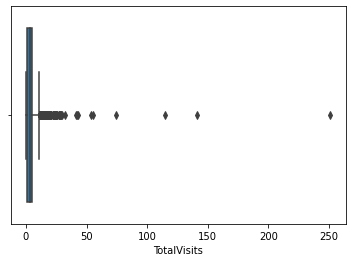

In [47]:
sns.boxplot(data["TotalVisits"])

As we can see that , there are outliers in the data and we will cap the outliers to 95% for analysis.

In [48]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

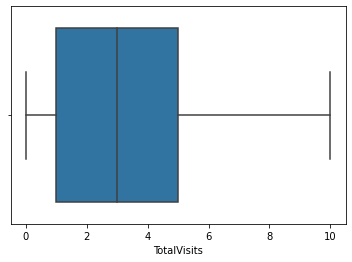

In [49]:
sns.boxplot(data["TotalVisits"])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

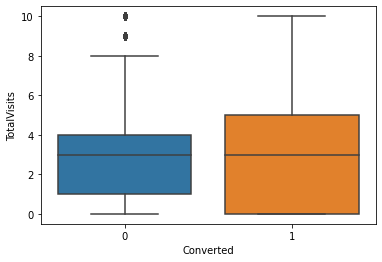

In [50]:
sns.boxplot(x="Converted",y="TotalVisits",data=data)

Inference: Median for converted and non-convereted are same and no clonclusion can be be drawn from this parameter

Total Time Spent in Website

<AxesSubplot:xlabel='Total Time Spent on Website'>

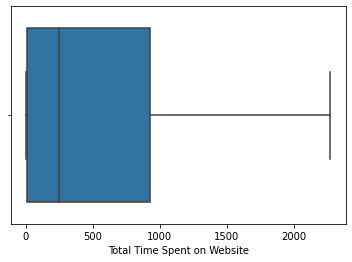

In [51]:
sns.boxplot(data["Total Time Spent on Website"])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

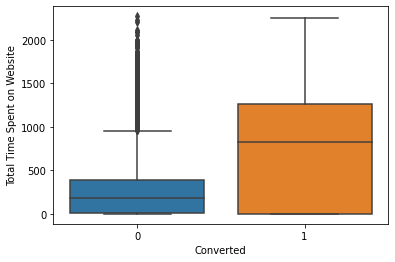

In [52]:
sns.boxplot(x="Converted",y="Total Time Spent on Website",data=data)

inference : Lead Spending more time on Website re more likely to get converted

**Website should be made more engaging to make leads spend more time**

Page Views Per Visit

<AxesSubplot:xlabel='Page Views Per Visit'>

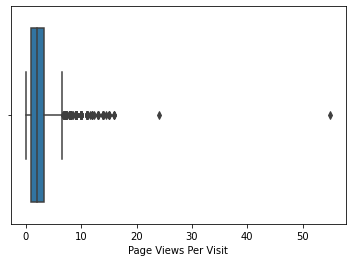

In [53]:
sns.boxplot(data["Page Views Per Visit"])

In [54]:
#As we can see that , there are outliers in the data and we will cap the outliers to 95% for analysis.
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

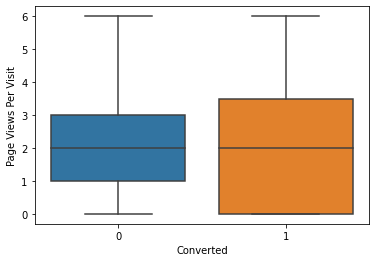

In [55]:
sns.boxplot(x="Converted",y="Page Views Per Visit",data=data)

Inference:

Median of both convered and non-converted leads are same.
**No inference can be drawn from this paramater**

Last Activity

In [56]:
data["Last Activity"].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

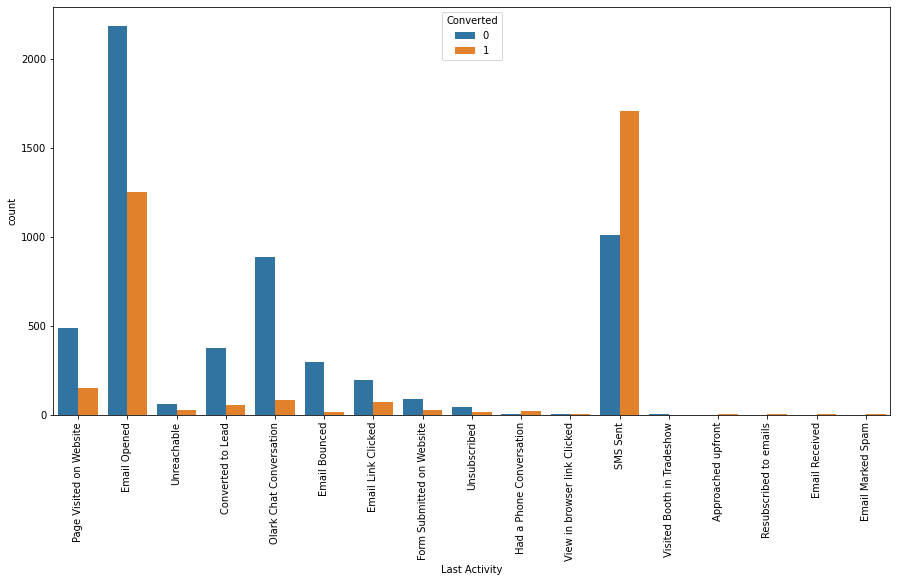

In [57]:
fig , axs= plt.subplots(figsize=(15,7.5))
sns.countplot(x="Last Activity",hue="Converted",data=data)
xticks(rotation=90)

In [58]:
data["Last Activity"]=data["Last Activity"].replace(['Email Marked Spam','Email Received','Resubscribed to emails','Approached upfront','Visited Booth in Tradeshow','View in browser link Clicked','Had a Phone Conversation'],"Other-activity")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other-activity'),
  Text(10, 0, 'SMS Sent')])

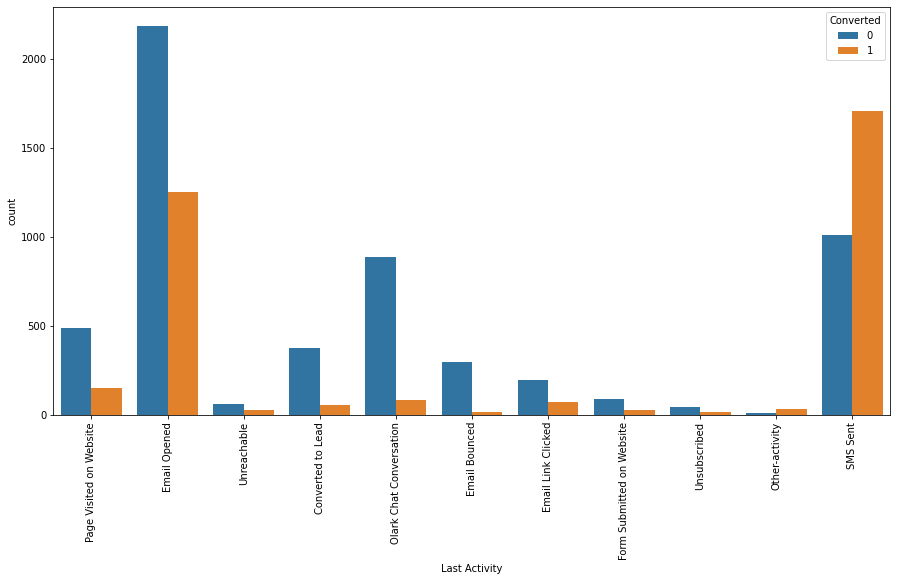

In [59]:
fig , axs= plt.subplots(figsize=(15,7.5))
sns.countplot(x="Last Activity",hue="Converted",data=data)
xticks(rotation=90)

Inference:

1. Most of the leads have their last activity as "Email opened"
2.Conversion rate of Leads with Last Activity as SMS Sent is high

Country

In [60]:
data["Country"].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

Most values are 'India ', no inference can be drawn.

Specialization                                   

In [61]:
data["Specialization"].describe()

count       9074
unique        19
top       others
freq        3282
Name: Specialization, dtype: object

In [62]:
data['Specialization']=data['Specialization'].replace(['others'],"Other_Specialization")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

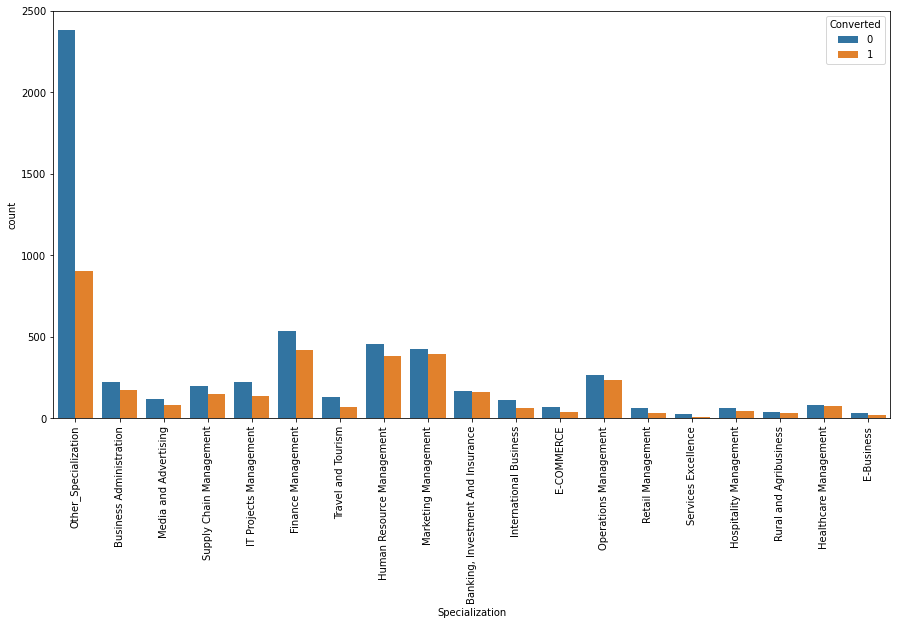

In [63]:
fig , axs= plt.subplots(figsize=(15,7.5))
sns.countplot(x="Specialization",hue="Converted",data=data)
xticks(rotation=90)

Inference:

Foucus Should be more on Specilization with higher conversion rate

Occupation:

In [64]:
data["What is your current occupation"].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [65]:
data["What is your current occupation"]=data["What is your current occupation"].replace(['others'],'others_occupation')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

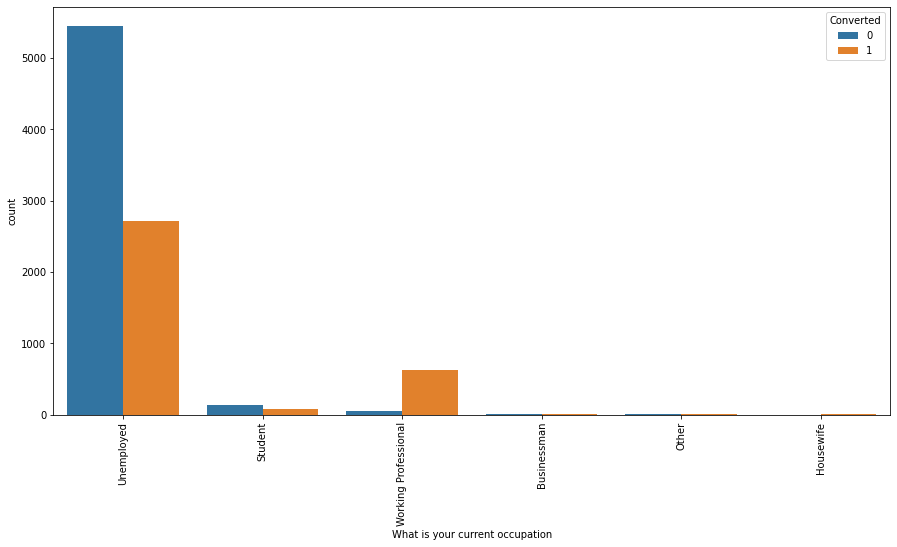

In [66]:
fig , axs= plt.subplots(figsize=(15,7.5))
sns.countplot(x="What is your current occupation",hue="Converted",data=data)
xticks(rotation=90)

Inference:

1.Unemployed are more in count but the conversion rate is around 40 to 45 %

2. Working professionals has high chances of joining the program

What matters most to you in choosing a course 


In [67]:
data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

Inference:

Better Career Prospects is the most common reason for what matters to you in choosing a course

Search

In [68]:
data["Search"].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

Inference:
Most of the entries are "No" , No inference can be drawn from this parameter.

Magazine

In [69]:
data["Magazine"].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

Inference:
Most of the entries are "No" , No inference can be drawn from this parameter.

News Paper Article

In [70]:
data["Newspaper Article"].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

Education Forum

In [71]:
data["X Education Forums"].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.


Newspaper

In [72]:
data["Newspaper"].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

Digital Advertisement

In [73]:
data["Digital Advertisement"].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.



Through Recommendations

In [74]:
data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

Receive More Updates About Our Courses

In [75]:
data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

Tags

In [76]:
data['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

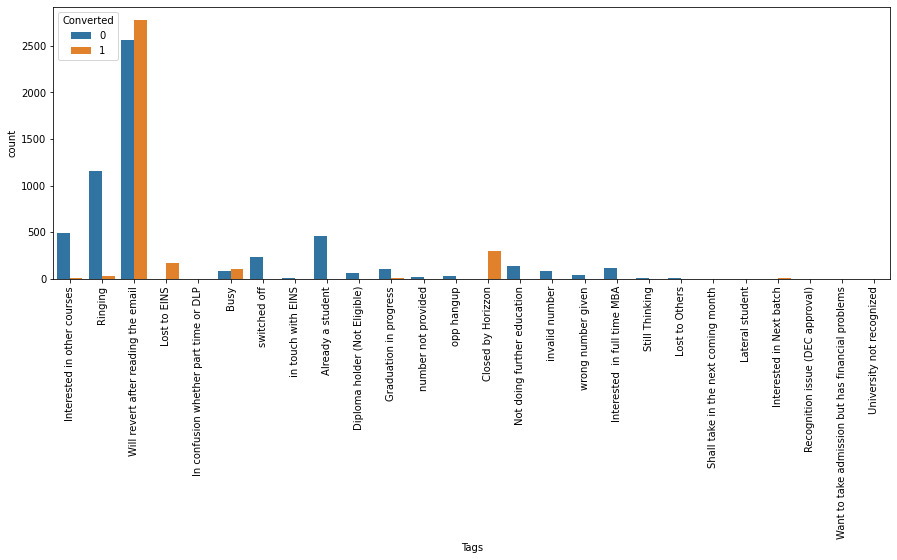

In [77]:
fig , axs= plt.subplots(figsize=(15,5))
sns.countplot(x="Tags",hue="Converted",data=data)
xticks(rotation=90)

In [79]:
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Other_Tags'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

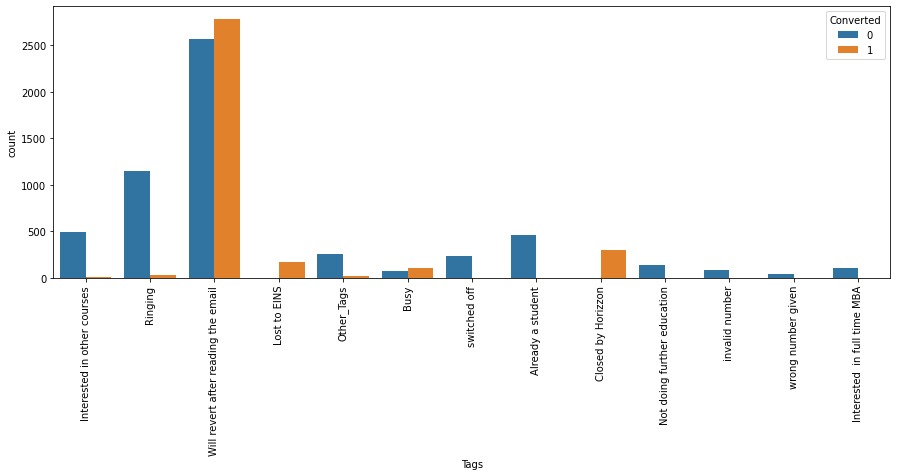

In [80]:
fig , axs= plt.subplots(figsize=(15,5))
sns.countplot(x="Tags",hue="Converted",data=data)
xticks(rotation=90)

Inferences: High conversion rate is for those leads who revert after reading the email.

Lead Quality

In [81]:
data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

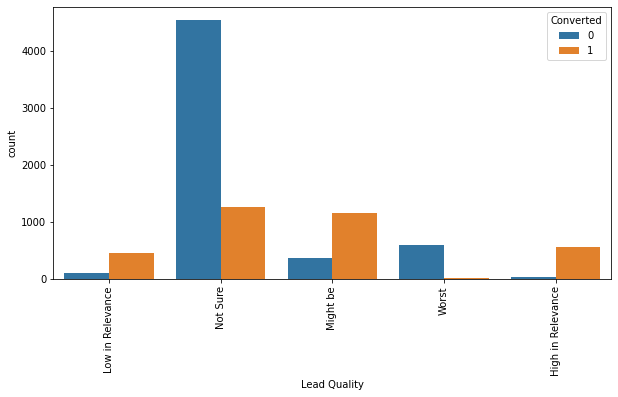

In [82]:
fig , axs= plt.subplots(figsize=(10,5))
sns.countplot(x="Lead Quality",hue="Converted",data=data)
xticks(rotation=90)

Update me on Supply Chain Content

In [83]:
data['Update me on Supply Chain Content']

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

Get updates on DM Content

In [84]:
data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

I agree to pay the amount through cheque

In [85]:
data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

A free copy of Mastering The Interview

In [86]:
data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

Inference: Most of the entries are "No" , No inference can be drawn from this parameter.

Last Notable Activity 

In [87]:
data["Last Notable Activity"].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

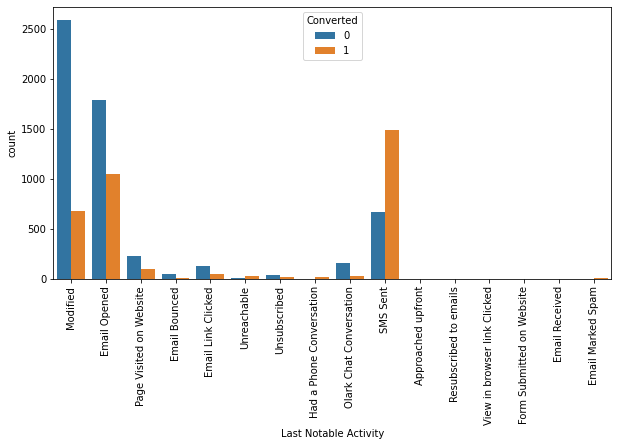

In [88]:
fig , axs= plt.subplots(figsize=(10,5))
sns.countplot(x="Last Notable Activity",hue="Converted",data=data)
xticks(rotation=90)

***RESULT***

As from the univariate analysis , we can see that more columns does not add values to the model. Hence we can drop these for further analysis

In [89]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [90]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [91]:
data.shape

(9074, 16)

**DATA PREPARATION**

Converting some binary variable Yes/No to 0/1

In [92]:
#List of variables are
varlist=["Do Not Email","Do Not Call"]
# Defining a map function

def binary_map(x):
  return x.map({"Yes":1,"No":0})

#Applying the function to the list
data[varlist]=data[varlist].apply(binary_map)


Creation of Dummy Variables

In [93]:
# creating the dummy variables to some of the categorical variables and dropping them first

dummy1=pd.get_dummies(data[["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","Tags","Lead Quality","City","Last Notable Activity"]],drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other-activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [94]:
# Merging the data frame with original data

data=pd.concat([data,dummy1],axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other-activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,

In [95]:
# dropping the original variables

data=data.drop(["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","Tags","Lead Quality","City","Last Notable Activity"],axis=1)

In [96]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other-activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
from sklearn.model_selection import train_test_split

#putting feature variable to X
X=data.drop(["Prospect ID","Converted"],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other-activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [98]:
# putting tresponse variable to Y

y=data["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
# Spiting the data in to train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

**FEATURE SCALING**

In [100]:
from pandas.core.arrays.sparse.array import Scalar
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other-activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [101]:
#Checking the churn rate
Converted=sum(data["Converted"]/len(data["Converted"])*100)
print(Converted)

37.85541106457961


we have almost 38 % Conversion

**MODEL BUILDING**

Running First Model

In [102]:
import statsmodels.api as sm

In [103]:
logm1=sm.GLM(y_train, (sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Sun, 26 Feb 2023   Deviance:                       2500.0
Time:                        13:11:05   Pearson chi2:                 3.87e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1433   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3882      0.327     -4.243      0.000      -2.030      -0.747
Do Not Call                                             23.7150   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1816      0.087      2.093      0.036       0.012       0.352
Total Time Spent on Website                              1.1457      0.064     17.913      0.000       1.020       1.271
Page Views Per Visit                                    -0.3272      0.099     -3.309      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9762      0.221     -4.420      0.000      -1.409      -0.543
Lead Origin_Lead Add Form                               -0.4165      1.287     -0.324      0.746      -2.940       2.107
Lead Origin_Lead Import                                 29.7289   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6304   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2017      0.155      1.302      0.193      -0.102       0.505
Lead Source_Olark Chat                                   0.8633      0.234      3.693      0.000       0.405       1.321
Lead Source_Organic Search                               0.2278      0.210      1.083      0.279      -0.185       0.640
Lead Source_Others                                       0.7602      0.816      0.931      0.352      -0.839       2.360
Lead Source_Reference                                    1.7732      1.344      1.319      0.187      -0.861       4.407
Lead Source_Referral Sites                              -0.0945      0.491     -0.193      0.847      -1.056       0.867
Lead Source_Welingak Website                             5.4722      1.486      3.682      0.000       2.559       8.385
Last Activity_Email Bounced                             -0.5488      0.870     -0.631      0.528      -2.254       1.157
Last Activity_Email Link Clicked                         0.8429      0.644      1.309      0.190      -0.419       2.105
Last Activity_Email Opened                              -0.0003      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1337      0.593      0.225      0.822      -1.028       1.296
Last Activity_Olark Chat Conversation                   -0.5464      0.392     -1.395      0.163      -1.314       0.221
Last Activity_Other-activity                             1

**FEATURE SELECTION USING RFE**

In [104]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=15)   # running with 15 variables as output
rfe=rfe.fit(X_train,y_train)

In [105]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [106]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Others', False, 47),
 ('Lead Source_Reference', False, 68),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 66),
 ('Last Activity_Form Submitted on Website', False, 67),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other-activity', False, 9),
 ('Last Activity_Page Visited on Website', False, 36),
 ('Last Activity_SMS Sent',

In [107]:
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [108]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

Assesing the model with Statsmodel

In [109]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Sun, 26 Feb 2023   Deviance:                       3160.2
Time:                        13:11:16   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7920      0.278     -2.845      0.004      -1.338      -0.246
Do Not Email                                  -1.3202      0.212     -6.236      0.000      -1.735      -0.905
Lead Origin_Lead Add Form                      1.0521      0.363      2.897      0.004       0.340       1.764
Lead Source_Welingak Website                   3.4638      0.819      4.231      0.000       1.859       5.068
What is your current occupation_Unemployed    -1.1148      0.237     -4.713      0.000      -1.578      -0.651
Tags_Busy                                      3.5772      0.333     10.752      0.000       2.925       4.229
Tags_Closed by Horizzon                        7.7760      0.762     10.203      0.000       6.282       9.270
Tags_Lost to EINS                              8.9986      0.754     11.931      0.000       7.520      10.477
Tags_Ringing                                  -1.9203      0.340     -5.640      0.000      -2.588      -1.253
Tags_Will revert after reading the email       3.7576      0.229     16.412      0.000       3.309       4.206
Tags_invalid number                          -23.4125   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                             -2.5224      0.589     -4.279      0.000      -3.678      -1.367
Tags_wrong number given                      -23.0270   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                         -3.3269      0.129    -25.702      0.000      -3.581      -3.073
Lead Quality_Worst                            -3.9922      0.832     -4.798      0.000      -5.623      -2.361
Last Notable Activity_SMS Sent                 2.7952      0.122     22.846      0.000       2.555       3.035
==============================================================================================================
"""

Tags_invalid number is having high P>|z|, let us drop that variable

In [110]:
col1=col.drop('Tags_invalid number',1)
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [111]:
X_train_sm=sm.add_constant(X_train[col1])
logm2=sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Sun, 26 Feb 2023   Deviance:                       3171.8
Time:                        13:11:16   Pearson chi2:                 3.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

Tags_wrong number given is having high P>|z|, let us drop that variable

In [112]:
col2=col1.drop('Tags_wrong number given',1)
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [113]:
X_train_sm=sm.add_constant(X_train[col2])
logm2=sm.GLM(y_train, X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Sun, 26 Feb 2023   Deviance:                       3175.8
Time:                        13:11:16   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

In [114]:
# getting y-train predicted on train set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

3009    0.187192
1012    0.167079
9226    0.000821
4750    0.781753
7987    0.977276
1281    0.989966
2880    0.187192
4971    0.753675
7536    0.863827
1248    0.000821
dtype: float64

In [115]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.87191534e-01, 1.67078806e-01, 8.21369066e-04, 7.81753466e-01,
       9.77276034e-01, 9.89966304e-01, 1.87191534e-01, 7.53674840e-01,
       8.63826796e-01, 8.21369066e-04])

Creating a dataframe with actual churn flag and predicted probabilities

In [116]:
y_train_pred_final=pd.DataFrame({ "Converted":y_train.values, "Conveted_probability":y_train_pred})
y_train_pred_final["Prospect ID"]=y_train.index
y_train_pred_final.head()

,Converted,Conveted_probability,Prospect ID
0,0,0.187192,3009
1,0,0.167079,1012
2,0,0.000821,9226
3,1,0.781753,4750
4,1,0.977276,7987


Creating a new column "Predicted" with Converted Probabilty>0.5 else 0

In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Conveted_probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conveted_probability,Prospect ID,predicted
0,0,0.187192,3009,0
1,0,0.167079,1012,0
2,0,0.000821,9226,0
3,1,0.781753,4750,1
4,1,0.977276,7987,1


In [118]:
from sklearn import metrics

#Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["predicted"])
print(confusion)

[[3756  149]
 [ 363 2083]]


In [119]:
# Let us check overall accuracy

print(metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["predicted"]))


0.9193827743662415


Accuracy of the model is 91.93 %

Checking VIF's

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [121]:
# create a dataframe

vif=pd.DataFrame()
vif['Features']=X_train[col2].columns
vif["VIF"]=[variance_inflation_factor(X_train[col].values,i) for i in range (X_train[col2].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
print(vif)

                                      Features   VIF
3   What is your current occupation_Unemployed  7.37
12              Last Notable Activity_SMS Sent  4.05
8     Tags_Will revert after reading the email  4.02
7                                 Tags_Ringing  1.86
1                    Lead Origin_Lead Add Form  1.58
2                 Lead Source_Welingak Website  1.34
5                      Tags_Closed by Horizzon  1.25
10                       Lead Quality_Not Sure  1.17
4                                    Tags_Busy  1.15
0                                 Do Not Email  1.11
6                            Tags_Lost to EINS  1.08
9                            Tags_switched off  1.06
11                          Lead Quality_Worst  1.03


Metrics Beyond Accuracy

In [122]:
TP=confusion[1,1]     # true positive
TN=confusion[0,0]     # true negative
FP=confusion[0,1]     # false positive
FN=confusion[1,0]     # false negative

In [123]:
# Let us see the sensitivity of our logistic regression model 
TP/float(TP+FN)

0.8515944399018807

In [124]:
# Letus calculate the specificity
TN/float(TN+FP)

0.9618437900128041

In [125]:
# calculating false positive rate -> predicting the customer as churn when actually they have not churned
FP/float(TN+FP)

0.038156209987195905

In [126]:
# Calculating positive predictive value
TP/float(TP+FP)

0.9332437275985663

In [127]:
# calculating negative predictive value
TN/float(TN+FN)

0.9118718135469774

**Plotting the ROC CURVE**



1.   ROC shows the trade off between sensitivity and specificity
2.   Closer the curve follows the left hand border and then top boarder of the ROC, more accurate the test is
3.   Closer the curve comes to 45 degree of the diagonal of the ROC space, less accurate the test is



In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"],y_train_pred_final["Conveted_probability"],drop_intermediate=False)

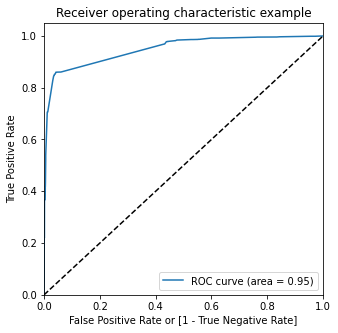

In [130]:
draw_roc(y_train_pred_final["Converted"],y_train_pred_final["Conveted_probability"])

**Finding the Optimal Cutoff Point**

Optimal cutoff probability  is the prob where get balanced sensitivity and specificity

In [131]:
# Let us create a column with different probability cutoff

numbers=[float(x)/10 for x in range (10)]
for i in numbers:
  y_train_pred_final[i]=y_train_pred_final["Conveted_probability"].map(lambda x :1 if x>i else 0)

y_train_pred_final.head()

,Converted,Conveted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187192,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.167079,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000821,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.781753,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977276,7987,1,1,1,1,1,1,1,1,1,1,1


In [132]:
# Now letus calculate the sensitivity ,specificity and accuracy for various probability cutoff

cutoff_df=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#TP=confusion[1,1]     # true positive
#TN=confusion[0,0]     # true negative
#FP=confusion[0,1]     # false positive
#FN=confusion[1,0]     # false negative

num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705086  0.981603  0.531882
0.2   0.2  0.909148  0.860589  0.939565
0.3   0.3  0.920013  0.859771  0.957746
0.4   0.4  0.919855  0.858953  0.958003
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919383  0.845462  0.965685
0.8   0.8  0.878917  0.706868  0.986684
0.9   0.9  0.818769  0.538839  0.994110


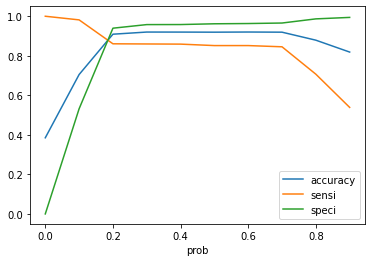

In [133]:
# Let us plot accuracy , senitivity and specificity for various probablities
cutoff_df.plot.line(x="prob", y=["accuracy","sensi","speci"])
plt.show()

In [134]:
# from the plot above , 0.20 is the optimum point to take it as a cutoff probability

y_train_pred_final['final_predicted']=y_train_pred_final["Conveted_probability"].map(lambda x :1 if x>0.2 else 0)
y_train_pred_final.head()

,Converted,Conveted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187192,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.167079,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000821,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.781753,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977276,7987,1,1,1,1,1,1,1,1,1,1,1,1


**Assigning the Lead Score**

In [135]:
y_train_pred_final['Lead_score']=y_train_pred_final["Conveted_probability"].map(lambda x : round(x*100))
y_train_pred_final.head()

,Converted,Conveted_probability,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_score
0,0,0.187192,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.167079,1012,0,1,1,0,0,0,0,0,0,0,0,0,17
2,0,0.000821,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.781753,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977276,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [136]:
# Let us checck over all accuracy
metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

confusion2=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])
confusion2

array([[3669,  236],
       [ 341, 2105]])

In [137]:
TP=confusion2[1,1]     # true positive
TN=confusion2[0,0]     # true negative
FP=confusion2[0,1]     # false positive
FN=confusion2[1,0]     # false negative

In [138]:
# Let us see the sensitivity of our logistic regression model 
TP/float(TP+FN)

0.8605887162714636

In [139]:
# Letus calculate the specificity
TN/float(TN+FP)

0.9395646606914213

In [140]:
#calculating false positive rate -> predicting the customer as churn when actually they have not churned
FP/float(TN+FP)

0.060435339308578744

In [141]:
# Calculating positive predictive value
TP/float(TP+FP)

0.8991883810337462

In [142]:
 #calculating negative predictive value
TN/float(TN+FN)#z

0.9149625935162095

**Precision And Recall**

In [143]:
# Let us look at the confusion matrix again
confusion=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["predicted"])
print(confusion)

[[3756  149]
 [ 363 2083]]


In [144]:
# Precision
TP/(TP+FP)

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

In [145]:
# Recall
TP/(TP+FN)

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

usnig sklearn utilities for the same

In [146]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9332437275985663

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8515944399018807

Precision And Recall Tradeoff

In [148]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [149]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

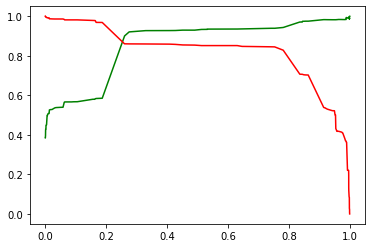

In [150]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conveted_probability)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making the prediction on the Test Data

In [151]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [152]:
X_test=X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [153]:
X_test_sm= sm.add_constant(X_test)

Making the prediction test set now


In [154]:
y_test_pred=res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

3271    0.187192
1490    0.953558
7936    0.187192
4216    0.999703
3830    0.187192
1800    0.953558
6507    0.012624
4821    0.000454
4223    0.996625
4714    0.187192
dtype: float64

In [156]:
# converting y-pred to a dataframe which is an array
y_pred_1=pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.187192
1490,0.953558
7936,0.187192
4216,0.999703
3830,0.187192


In [157]:
# converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [158]:
# putting customer ID to the index
y_test_df["Prospect ID"]=y_test.index

In [159]:
# Removing the index for both the dataframe to put side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [160]:
# Merging the two dataset
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.187192
1,1,1490,0.953558
2,0,7936,0.187192
3,1,4216,0.999703
4,0,3830,0.187192


In [161]:
# Renaming the column
y_pred_final=y_pred_final.rename(columns={0:"Converted_prob"})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.187192
1,1,1490,0.953558
2,0,7936,0.187192
3,1,4216,0.999703
4,0,3830,0.187192


In [168]:
y_pred_final["final_predicted"]=y_pred_final["Converted_prob"].map(lambda x:1 if x > 0.2 else 0)
y_pred_final.head()


,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.187192,0
1,1,1490,0.953558,1
2,0,7936,0.187192,0
3,1,4216,0.999703,1
4,0,3830,0.187192,0


In [169]:
# Letus Check over all accuracy
metrics.accuracy_score(y_pred_final["Converted"],y_pred_final["final_predicted"])

0.9045170767535806

In [170]:
confusion2=metrics.confusion_matrix(y_pred_final["Converted"],y_pred_final["final_predicted"])
confusion2

array([[1628,  106],
       [ 154,  835]])

In [173]:
TP=confusion2[1,1]     # true positive
TN=confusion2[0,0]     # true negative
FP=confusion2[0,1]     # false positive
FN=confusion2[1,0] 

In [174]:
# Let us see the sensitivity of our logistic regression model

TP/float(TP+FN)

0.8442871587462083

In [175]:
#Let us calculate the specificity
TN/float(TN+FP)

0.9388696655132641

**CONCLUSION**


**Train Data**:

Accuracy=91.93%

Sensitiviy=85.15%

Specificity=96.18%


**Test Data :**

Accuracy=90.45%

Sensitiviy=84.42%

Specificity=93.88%

**Valuable Insights:**

1. The sales team of X-Education should focus on leads having 
 1.Lead_Origin:Lead Add Form
 2.Occupation : Working Profession
 3.Lead Source:Welingak Websit


2.Lead Spending more time on Website are more likely to get converted


3.The Sensitivity , Specificity and accuracy obtained in test set are almost accurate.


4.High Sensitivity ensures that almost all the leads who are likely to convert are correctly predicted.


5. High specificity will ensure that leads that are on the brink of probability of getting converted or not are not selected.

6. It is better not focus more on customer who do not want to be called about the course.

7.If last notable action is modified , he/she may not be a potensial lead